In [1]:
import numpy as np
import fermion as f
import matplotlib.pyplot as plt
from pandas import DataFrame
from fermion import Math as fm

from timeit import default_timer as timer

In [2]:
n=50

In [3]:
dq = f.Operator.double_quantum(n)
Z = f.Operator.global_Z(n)

time_evo = f.Unitary(dq,.05,4.05)

In [4]:
start = timer()
Zt = [time_evo.evolve_op(Z,t) for t in time_evo.t]
end = timer()
print(end - start)

0.13315940000000026


In [5]:
start = timer()
comm2 = [-Zt[i].commutator(Z).square_trace() for i in range(len(Zt))]
end = timer()
print(end - start)

2.902948500000001


In [6]:
signal = [comm2[i]/Z.n_fermion for i in range(len(Zt))]

C:\Users\awsta\Documents\workspace\tqd-env\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


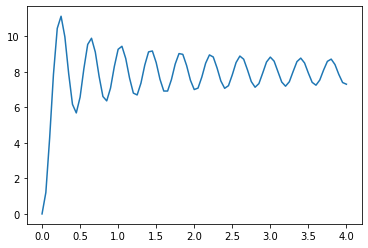

In [7]:
plt.plot(time_evo.t, signal)

In [8]:
lZ = [f.Operator.local_Z(i,n) for i in range(n)]

In [9]:
Zmid = lZ[int(n/2)-1]
Zmt = [time_evo.evolve_op(Zmid,t) for t in time_evo.t]

In [10]:
def locOTOCs(idx):
    obs = 0;
    for i in range(n):
        obs += - Zmt[idx].commutator(lZ[i]).square_trace()
    return obs

In [11]:
start = timer()
msig = [locOTOCs(i) for i in range(len(Zt))]
end = timer()
print(end - start)

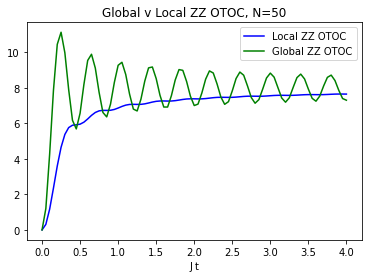

In [12]:
fig, ax = plt.subplots()
ax.set_title('Global v Local ZZ OTOC, N=50')
c = ax.plot(time_evo.t, msig,'b', time_evo.t, signal, 'g')
ax.legend(['Local ZZ OTOC', 'Global ZZ OTOC'])
ax.set_xlabel('J t')
plt.savefig("zz_otoc_lvg.png")
plt.show()

In [14]:
def fully_local_OTOC(l, idx):
    return -Zmt[idx].commutator(lZ[l]).square_trace()

In [15]:
start = timer()
light_cone = [[fully_local_OTOC(l,t) for t in range(len(Zmt))] for l in range(n)]
end = timer()
print(end-start)

120.99986140000001


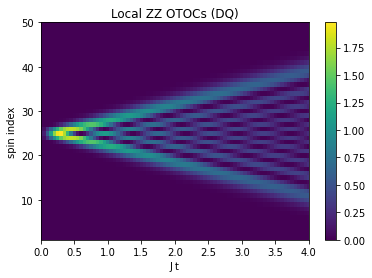

In [16]:
fig, ax = plt.subplots()

c = ax.pcolormesh(time_evo.t, list(range(1,51)), np.real(light_cone))
ax.set_title('Local ZZ OTOCs (DQ)')
# set the limits of the plot to the limits of the data
ax.axis([0,4, 1, 50])
ax.set_ylabel('spin index')
ax.set_xlabel('J t')
fig.colorbar(c, ax=ax)
plt.savefig("zz_lightcone.png")
plt.show()

In [ ]:
X, Y, Z = axes3d.get_test_data(0.05)